In [1]:
#https://www.kaggle.com/datasets/seymasa/rice-dataset-gonenjasmine
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_rice = pd.read_csv('rice.csv')
df_rice.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [3]:
df_rice = df_rice.drop('id',axis=1)

In [4]:
df_rice.shape

(18185, 11)

In [5]:
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 1.5+ MB


In [6]:
df_rice.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [7]:
df_rice['Class'].unique()

array(['jasmine', 'Gonen'], dtype=object)

In [8]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df_rice['Class'] = label_encoding.fit_transform(df_rice['Class'].astype(str))
df_rice.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [9]:
df_rice = df_rice.sample(frac=0.5).reset_index(drop=True)
df_rice.shape

(9092, 11)

In [10]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

In [11]:
features = df_rice.drop('Class',axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names = features.columns
features = scaler.fit_transform(features)
features = pd.DataFrame(data=features, columns=col_names)
features.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,-0.610753,-0.006222,-0.699926,0.714013,-0.583787,-0.577005,-1.005894,-0.292745,-0.774787,0.626647
1,-0.783003,0.097391,-1.005032,0.978956,-0.791401,-0.762701,-0.026902,-0.486480,-0.856194,1.092256
2,-1.418689,-0.660057,-1.518314,1.134787,-1.434268,-1.485100,-0.666940,-1.294701,-1.100654,1.419422
3,-1.849999,-2.351075,-1.401884,0.388991,-1.855503,-2.014770,0.587183,-2.470942,-0.120606,0.168544
4,-0.341441,0.558990,-0.660977,0.867171,-0.342796,-0.294163,-0.910159,-0.021135,-0.616065,0.883565


In [13]:
label = df_rice["Class"]

# KMeans

In [14]:
kmeans_model = KMeans(n_clusters=2, init="k-means++", max_iter=5000, n_init='auto').fit(features)

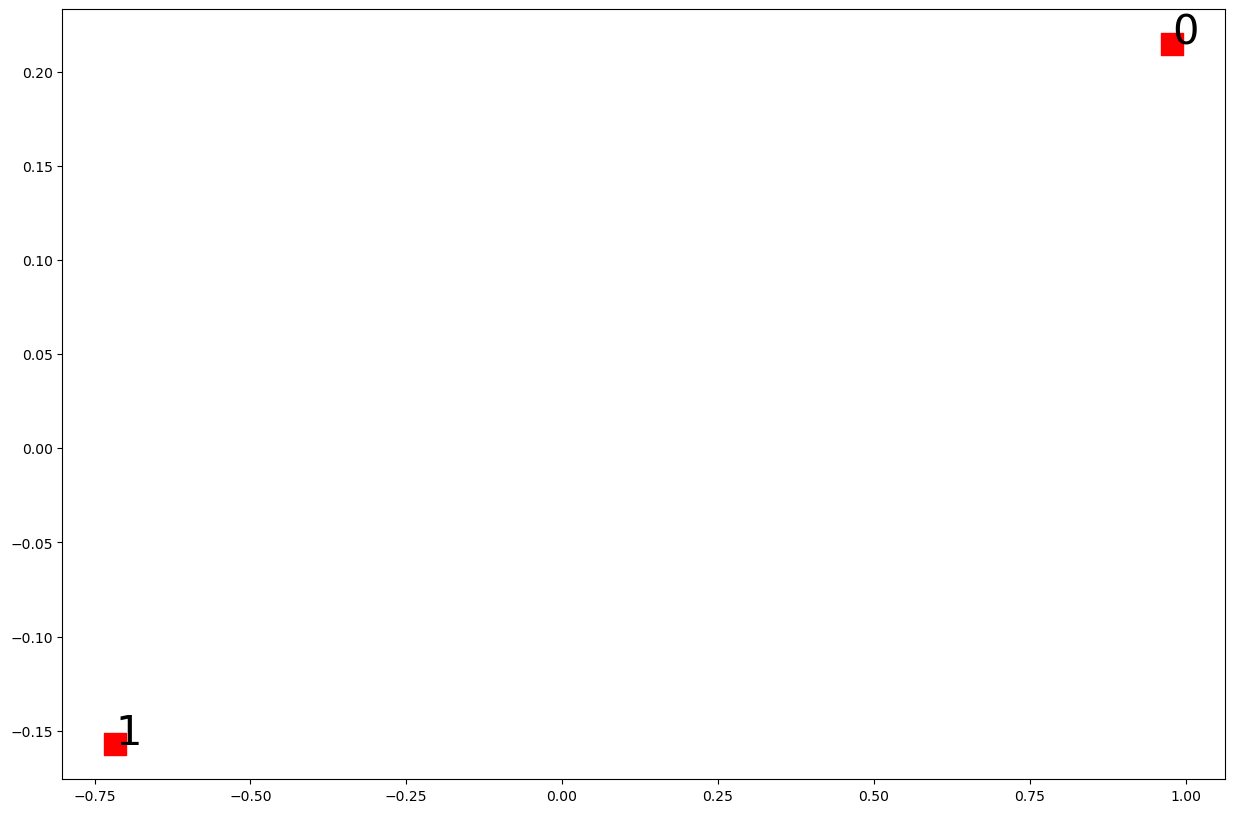

In [15]:
centroids = kmeans_model.cluster_centers_

fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=30)

In [16]:
from sklearn import metrics
print("Homogeneity_score: ", metrics.homogeneity_score(label, kmeans_model.labels_))
print("Completeness_score: ", metrics.completeness_score(label, kmeans_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(label, kmeans_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(label, kmeans_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(label,  kmeans_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(features, kmeans_model.labels_))

Homogeneity_score:  0.8392896113362159
Completeness_score:  0.8471867253858933
v_measure_score:  0.8432196788012087
Adjusted_rand_score:  0.8975786196681936
Adjusted_mutual_info_score:  0.8432070775355022
Silhouette_score:  0.4946606812260302


## Hyperparameter using ParameterGrid

In [23]:
from sklearn.model_selection import ParameterGrid
parameters = {'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]}
parameter_grid = ParameterGrid(parameters)

In [26]:
best_score = -1
for g in parameter_grid:
    model = KMeans(**g, n_init='auto')
    model.fit(features)
    ss = metrics.silhouette_score(features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.49465657792596374
Parameter:  {'n_clusters': 3} Score:  0.4597661775109626
Parameter:  {'n_clusters': 4} Score:  0.3796868864504335
Parameter:  {'n_clusters': 5} Score:  0.34740552727949153
Parameter:  {'n_clusters': 6} Score:  0.358241546617585
Parameter:  {'n_clusters': 7} Score:  0.2906045332277605
Parameter:  {'n_clusters': 8} Score:  0.29169483200238266
Parameter:  {'n_clusters': 9} Score:  0.3236881587891748
Parameter:  {'n_clusters': 10} Score:  0.2636740801405318
Parameter:  {'n_clusters': 20} Score:  0.2429339051061781
Parameter:  {'n_clusters': 30} Score:  0.22546687725600695


In [27]:
best_grid

{'n_clusters': 2}

# Agglomerative

In [35]:
agglo_model = AgglomerativeClustering(n_clusters=2).fit(features)

In [36]:
print("Homogeneity_score: ", metrics.homogeneity_score(label, agglo_model.labels_))
print("Completeness_score: ", metrics.completeness_score(label, agglo_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(label, agglo_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(label, agglo_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(label, agglo_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(features, agglo_model.labels_))

Homogeneity_score:  0.7968398337845883
Completeness_score:  0.7955406348517716
v_measure_score:  0.7961897043198849
Adjusted_rand_score:  0.8768713116949731
Adjusted_mutual_info_score:  0.796173412722085
Silhouette_score:  0.48271627236095027


## Hyperparameter using ParameterGrid

In [38]:
parameters = {'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]}
parameter_grid = ParameterGrid(parameters)

In [39]:
best_score = -1
for g in parameter_grid:
    model = AgglomerativeClustering(**g)
    model.fit(features)
    ss = metrics.silhouette_score(features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.48271627236095027
Parameter:  {'n_clusters': 3} Score:  0.44715871010420805
Parameter:  {'n_clusters': 4} Score:  0.33131953998624736
Parameter:  {'n_clusters': 5} Score:  0.31622729790450166
Parameter:  {'n_clusters': 6} Score:  0.3222783813771461
Parameter:  {'n_clusters': 7} Score:  0.3043464542640774
Parameter:  {'n_clusters': 8} Score:  0.21840311861922782
Parameter:  {'n_clusters': 9} Score:  0.22089655053282395
Parameter:  {'n_clusters': 10} Score:  0.22407700656398274
Parameter:  {'n_clusters': 20} Score:  0.16423518921315275
Parameter:  {'n_clusters': 30} Score:  0.16630819098143357


In [40]:
best_grid

{'n_clusters': 2}

# MeanShift

In [41]:
meanshift_model = MeanShift(bandwidth=0.85).fit(features)

In [42]:
print("Homogeneity_score: ", metrics.homogeneity_score(label, meanshift_model.labels_))
print("Completeness_score: ", metrics.completeness_score(label, meanshift_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(label, meanshift_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(label, meanshift_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(label, meanshift_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(features, meanshift_model.labels_))

Homogeneity_score:  0.885999309158845
Completeness_score:  0.22355107081918626
v_measure_score:  0.3570204614078735
Adjusted_rand_score:  0.23044722673829518
Adjusted_mutual_info_score:  0.35364022609532975
Silhouette_score:  0.1029613145734839


## Hyperparameter using ParameterGrid

In [44]:
from sklearn.cluster import estimate_bandwidth
est=estimate_bandwidth(features)

In [48]:
model = MeanShift(bandwidth=est).fit(features)
metrics.silhouette_score(features, model.labels_)

0.4945965820083592

In [49]:
print("Homogeneity_score: ", metrics.homogeneity_score(label, model.labels_))
print("Completeness_score: ", metrics.completeness_score(label, model.labels_))
print("v_measure_score: ", metrics.v_measure_score(label, model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(label, model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(label, model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(features, model.labels_))

Homogeneity_score:  0.8299362833170322
Completeness_score:  0.8386877009529403
v_measure_score:  0.8342890428931679
Adjusted_rand_score:  0.889256688876094
Adjusted_mutual_info_score:  0.8342757163680685
Silhouette_score:  0.4945965820083592


# DBSCAN

In [50]:
dbscan_model = DBSCAN(eps=0.55, min_samples=4).fit(features)

In [51]:
print("Homogeneity_score: ", metrics.homogeneity_score(label, dbscan_model.labels_))
print("Completeness_score: ", metrics.completeness_score(label, dbscan_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(label, dbscan_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(label, dbscan_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(label, dbscan_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(features, dbscan_model.labels_))

Homogeneity_score:  0.010082253190884292
Completeness_score:  0.024631903116187213
v_measure_score:  0.014308000551356724
Adjusted_rand_score:  -0.004688271746025541
Adjusted_mutual_info_score:  0.011654583163561522
Silhouette_score:  -0.3721298503268086


## Hyperparameter using ParameterGrid

In [55]:
parameters = {'eps': [0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
              'min_samples': [5, 7, 10, 12]}
parameter_grid = ParameterGrid(parameters)

In [56]:
model = DBSCAN()
best_score = -1
for g in parameter_grid:
    model.set_params(**g)
    model.fit(features)
    ss = metrics.silhouette_score(features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  0.16551926356177304
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  0.39877679920125625
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  0.4079350430903703
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  0.39219645357477956
Parameter:  {'eps': 1.0, 'min_samples': 5} Score:  0.41789533891084907
Parameter:  {'eps': 1.0, 'min_samples': 7} Score:  0.4203907466084431
Parameter:  {'eps': 1.0, 'min_samples': 10} Score:  0.4663626825099385
Parameter:  {'eps': 1.0, 'min_samples': 12} Score:  0.4219621569283308
Parameter:  {'eps': 1.1, 'min_samples': 5} Score:  0.48975699094766184
Parameter:  {'eps': 1.1, 'min_samples': 7} Score:  0.4958779718440127
Parameter:  {'eps': 1.1, 'min_samples': 10} Score:  0.4201748853439947
Parameter:  {'eps': 1.1, 'min_samples': 12} Score:  0.4327054594910439
Parameter:  {'eps': 1.2, 'min_samples': 5} Score:  0.5022024915792357
Parameter:  {'eps': 1.2, 'min_samples': 7} Score:  0.5049365498402753
Parameter

In [57]:
best_grid

{'eps': 2.0, 'min_samples': 5}

In [58]:
dbscan_model = DBSCAN(eps=2.0, min_samples=5).fit(features)

In [59]:
print("Homogeneity_score: ", metrics.homogeneity_score(label, dbscan_model.labels_))
print("Completeness_score: ", metrics.completeness_score(label, dbscan_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(label, dbscan_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(label, dbscan_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(label, dbscan_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(features, dbscan_model.labels_))

Homogeneity_score:  9.485902221552528e-05
Completeness_score:  0.05862663223624586
v_measure_score:  0.0001894115728512986
Adjusted_rand_score:  -4.1937051000788914e-05
Adjusted_mutual_info_score:  -3.0230890646845365e-05
Silhouette_score:  0.5756941738099367
